In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = with open('Data_PS.csv') as csvfile:

In [19]:
df

,default,housing,loan,campaign,pdays,previous,y
0,no,yes,no,1,-1,0,no
1,no,yes,no,1,-1,0,no
2,no,yes,yes,1,-1,0,no
3,no,yes,no,1,-1,0,no
4,no,no,no,1,-1,0,no
...,...,...,...,...,...,...,...
45206,no,no,no,3,-1,0,yes
45207,no,no,no,2,-1,0,yes
45208,no,no,no,5,184,3,yes
45209,no,no,no,4,-1,0,no


In [21]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [22]:
df['default'] = df['default'].map({'yes': 1, 'no': 0})

In [23]:
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})

In [24]:
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

In [25]:
df.head()

,default,housing,loan,campaign,pdays,previous,y
0,0,1,0,1,-1,0,0
1,0,1,0,1,-1,0,0
2,0,1,1,1,-1,0,0
3,0,1,0,1,-1,0,0
4,0,0,0,1,-1,0,0


<AxesSubplot:xlabel='y', ylabel='count'>

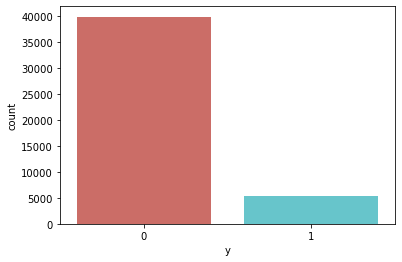

In [28]:
sns.countplot(x='y',data=df, palette='hls')

<AxesSubplot:xlabel='loan', ylabel='count'>

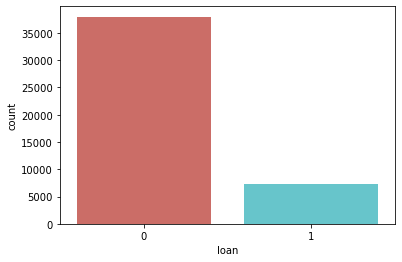

In [29]:
sns.countplot(x='loan',data=df, palette='hls')

<AxesSubplot:xlabel='housing', ylabel='count'>

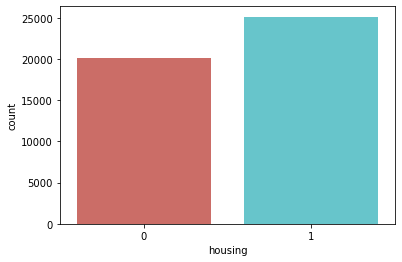

In [31]:
sns.countplot(x='housing',data=df, palette='hls')

<AxesSubplot:xlabel='default', ylabel='count'>

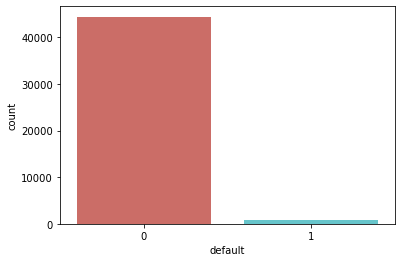

In [32]:
sns.countplot(x='default',data=bank, palette='hls')

In [34]:
df.sum()

default         815
housing       25130
loan           7244
campaign     124956
pdays       1817384
previous      26237
y              5289
dtype: int64

In [35]:
df.shape

(45211, 7)

In [36]:
df.isnull().sum()

default     0
housing     0
loan        0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

In [37]:
X = df.iloc[:,1:] # Excluding zeroth column, every other columns is in X 
Y = df.iloc[:,0] #Zeroth column is in Y 

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [41]:
Y_pred = classifier.predict(X)

In [42]:
Y_pred_df = pd.DataFrame({'actual' : Y, 'Predicted_prob' : classifier.predict(X) })

In [43]:
Y_pred_df

,actual,Predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,0,0


In [45]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(Y, Y_pred)
print(conf)

[[44396     0]
 [  815     0]]


In [46]:
((44396 + 0) / (44396 + 0 + 815 + 0))*100

98.19734135497998

In [49]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*',)
warnings.warn('Do not show this message')

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [52]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

In [53]:
auc = roc_auc_score(Y,Y_pred)
print(auc)

0.5


Text(0, 0.5, 'true positive rate')

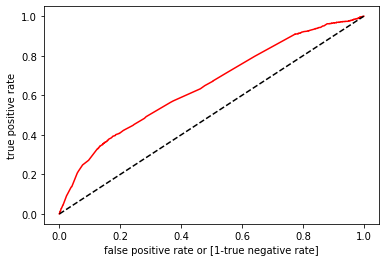

In [54]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red',label='Logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate or [1-true negative rate]')
plt.ylabel('true positive rate')

In [55]:
fpr

array([0.00000000e+00, 2.25245518e-05, 1.35147311e-04, ...,
       9.98355708e-01, 9.98400757e-01, 1.00000000e+00])

In [56]:
thresholds

array([1.11537295e+00, 1.15372955e-01, 8.88286544e-02, ...,
       2.40979045e-03, 2.40838496e-03, 4.88651778e-08])